# mBuild Tutorial 08: Building Polymers

Description

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

In the previous tutorial we finished up by creating a class for constructing a linear alkane chain. One could imagine that the same approach we took to create this class (i.e. successively adding CH2 units) could be further generalized to support the creation of any linear polymer. In fact, mBuild contains a class that does just this, `mbuild.Polymer`.

Here, we'll explore how `Polymer` works by creating a PEG (polyethylene glycol) molecule. We first need to define classes for our CH2 and oxygen monomer units.

In [2]:
class CH2(mb.Compound):
    def __init__(self):
        super(CH2, self).__init__()
        
        mb.load('ch2.pdb', compound=self)
        carbon = list(self.particles_by_name('C'))[0]
        up_port = mb.Port(anchor=carbon, orientation=[0, 0, 1], separation=0.075)
        down_port = mb.Port(anchor=carbon, orientation=[0, 0, -1], separation=0.075)
        self.add(up_port, label='up')
        self.add(down_port, label='down')

class O(mb.Compound):
    def __init__(self):
        super(O, self).__init__()
        
        self.add(mb.Particle(name='O'))
        up_port = mb.Port(anchor=self[0], orientation=[0, 0, 1], separation=0.075)
        self.add(up_port, 'up')
        down_port = mb.Port(anchor=self[0], orientation=[0, 0, -1], separation=0.075)
        self.add(down_port, 'down')

We'll now feed instances of these two monomers to the `monomers` argument of `Polymer`. We also need to provide a few additional arguments. One of these is the `sequence`, which is provided as a string of characters where each unique character represents one repetition of a monomer. Here, `AAB` means that we want two `CH2`'s for each `O`. We can use the `n` argument to specify the number of times the sequence should be replicated. The `port_labels` argument tells mBuild the names of the two `Ports` to connect when stitching together the polymer.

<IPython.core.display.Javascript object>


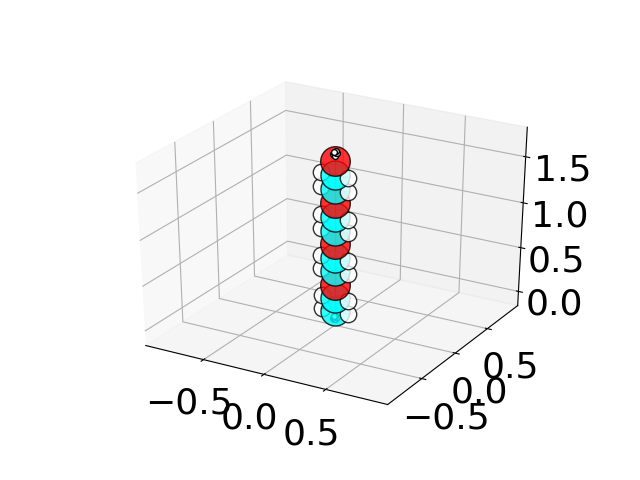

In [4]:
peg4 = mb.Polymer(monomers=(CH2(), O()), sequence='AAB', n=4, port_labels=('up', 'down'))
visualize(peg4)

<IPython.core.display.Javascript object>


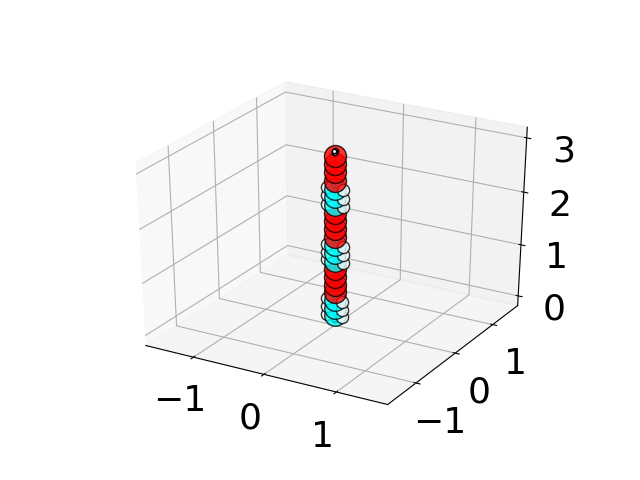

In [6]:
polymer = mb.Polymer(monomers=(CH2(), O()), sequence='AAABBBB', n=3, port_labels=('up', 'down'))
visualize(polymer)